In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [178]:
df = pd.read_csv('uber .csv')

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [180]:
df = pd.read_csv('uber .csv')
df.dropna(inplace = True , axis = 0)

In [181]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [182]:
df.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [183]:
df.drop('pickup_datetime' , axis = 1 , inplace = True)

In [184]:
df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5


In [185]:
df.drop('key' , inplace = True , axis = 1)

In [186]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


In [187]:
import math
def eucladian_distance(lat1 , lon1 , lat2 , lon2):
  dlat = lat2 - lat1
  dlon = lon2 - lon1
  distance = np.sqrt(dlat**2 + dlon**2)
  return distance

In [188]:
df['distance'] = eucladian_distance(df['pickup_longitude'],	df['pickup_latitude'],	df['dropoff_longitude']	,df['dropoff_latitude'])

In [189]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,0.015140
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,0.022103
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0.053109
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,0.016528
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,0.051031


<Axes: ylabel='fare_amount'>

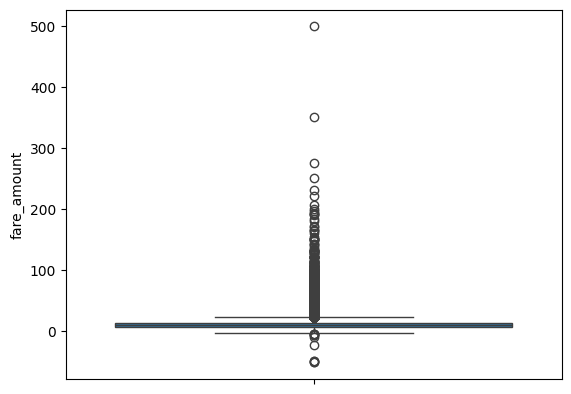

In [190]:
sns.boxplot(y = df['fare_amount'])

<Axes: ylabel='pickup_latitude'>

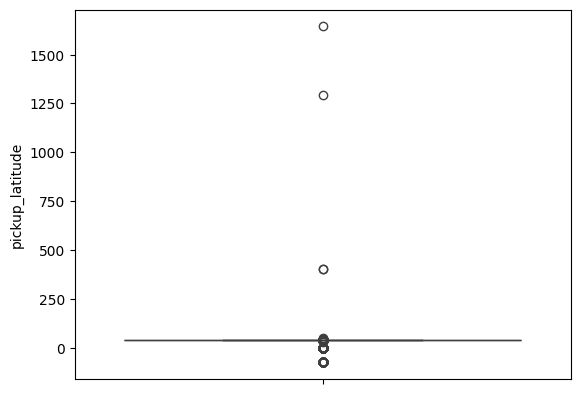

In [191]:
sns.boxplot(y = df['pickup_latitude'])

In [192]:
def outlierremoval(df , col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75);
  IQR = q3-q1

  lb = q1 -1.5*IQR
  ub = q3 +1.5*IQR

  df = df[(df[col]>=lb) & (df[col]<=ub)]
  return df

In [193]:
outlierremoval(df,'pickup_latitude')
outlierremoval(df,'dropoff_latitude')
outlierremoval(df,'pickup_longitude')
outlierremoval(df,'dropoff_longitude')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,0.015140
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,0.022103
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0.053109
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,0.016528
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,0.051031
...,...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1,0.012060
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.001064
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,0.022126
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,0.033101


<Axes: >

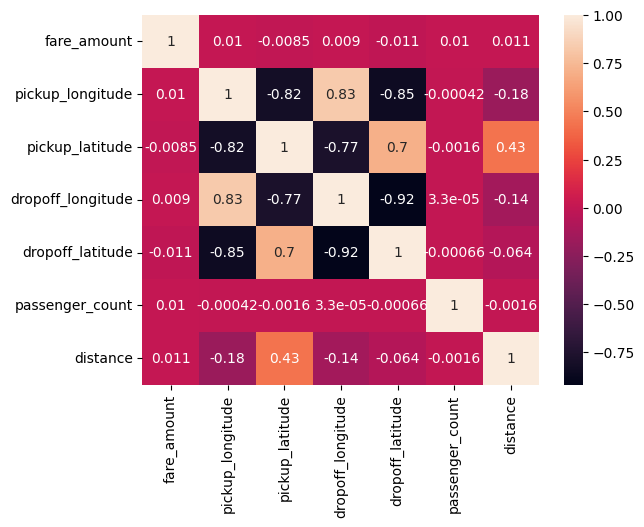

In [194]:
sns.heatmap(df.corr(),annot = True)

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train-test split
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the splits
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# We cannot use the fit() method on the test dataset, because
# it could introduce bias to the testing dataset. So, we apply the transform()
# method directly on the test dataset.
X_test_scaled = scaler.transform(X_test)

In [196]:
from sklearn.linear_model import LinearRegression

# linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

print("R2 score: ", r2_score(y_test, y_pred))
print("RMSE: ", root_mean_squared_error(y_test, y_pred))

R2 score:  0.00010115355969608775
RMSE:  10.198696569430133


In [176]:
from sklearn.ensemble import RandomForestRegressor

# random forest regression model
# takes more time to train (comeback after 2 mins)
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

print("R2 score: ", r2_score(y_test, y_pred))
print("RMSE: ", root_mean_squared_error(y_test, y_pred))

R2 score:  0.716865380934153
RMSE:  5.427041270985915
